<a href="https://colab.research.google.com/github/snz-mlcoder/Fashion/blob/main/FashinMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U tensorflow_datasets


In [2]:
import tensorflow as tf


In [3]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()


In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

سطوح مختلف شامل DEBUG, INFO, WARNING, ERROR, CRITICAL هستند.

In [6]:
dataset , metadata= tfds.load('fashion_mnist', as_supervised= True , with_info = True)
train_dataset , test_dataset = dataset['train'], dataset['test']


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [7]:
class_name = metadata.features['label'].names
print ("class names :{}".format(class_name))

class names :['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


number of training set & number of test set

In [8]:
num_training = metadata.splits['train'].num_examples
num_test = metadata.splits['test'].num_examples #also num_shards , num_bythes
print ("number of training set:{}".format(num_training))
print("number of test set :{}".format(num_test))

number of training set:60000
number of test set :10000


In [9]:
#Preprocess the data
def normalize(images , labels):
  images = tf.cast(images , tf.float32)
  images /= 255
  return images,labels

  #applies the normalize function to each element
  train_dataset = train_dataset.map(normalize)
  test_dataset = test_dataset.map(normalize)

  #Caching will keep them in memory
  train_dataset =   train_dataset.cache()
  test_dataset =   test_dataset.cache()




uint8 (0,255) unsigned


The float32 /data type provides sufficient numerical precision. It offers higher precision than float16 while consuming less memory than float64.
Many modern hardware (e.g., GPUs) are optimized for computations with float32.
 Many libraries and pre-trained models in TensorFlow default to using float32.

 scaled to the range of 0.0 to 1.0. This normalization helps machine learning models to learn better and faster because the values are within a fixed and suitable range.

In [10]:
for image,label in test_dataset.take(1):
    image = image.numpy().reshape((28,28))
    print(image.shape)
    print(label.numpy())

#change tensor to array


(28, 28)
4


In this example, take(1) means that only one sample (an image and its label) is selected from the original dataset.
If you need more samples, you can change the number inside take. For instance, take(5) will select the first five samples.
     
change (28, 28, 1) to(28, 28)  

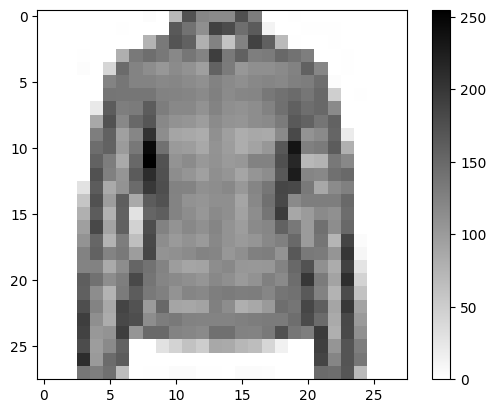

In [11]:
#plot
plt.figure()
plt.imshow(image , cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


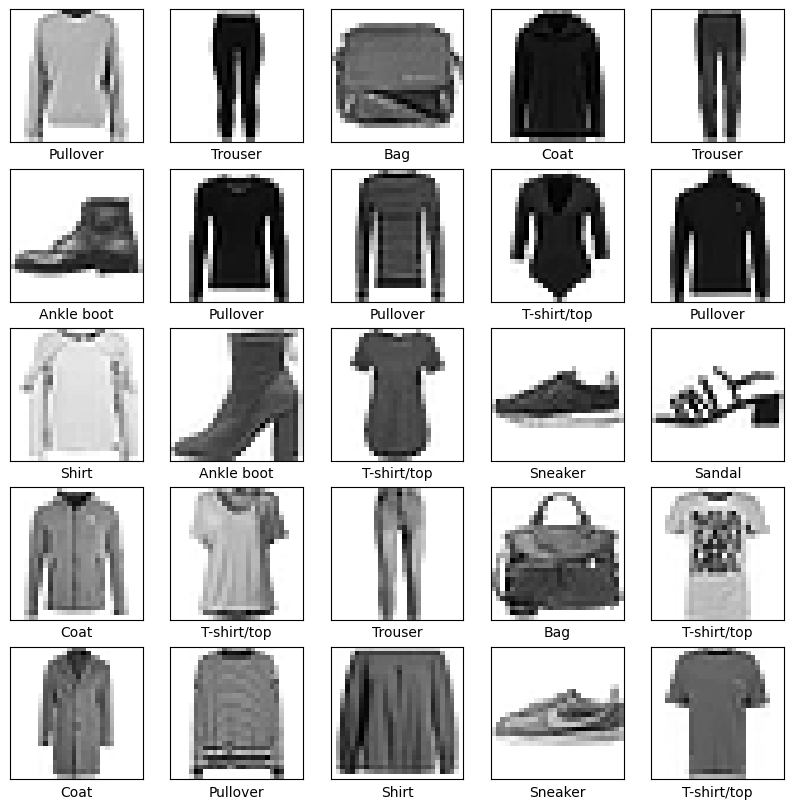

In [12]:
plt.figure(figsize=(10,10))
for i , (image , label) in enumerate( train_dataset.take(25)) :
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks ([]) #plt.xticks([0, 1, 2, 3], ['zero', 'one', 'two', 'three'])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_name[label])
plt.show()

In [13]:
#note : capital S for Sequential
model = tf.keras.Sequential ([
    tf.keras.layers.Flatten(input_shape = (28,28,1)),
    tf.keras.layers.Dense(128,activation =tf.nn.relu),
    tf.keras.layers.Dense(10 , activation=tf.nn.softmax)
  ])

In [14]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

loss='binary_crossentropy' #activation='sigmoid'

loss='categorical_crossentropy'#softmax
loss='sparse_categorical_crossentropy'#softmax
loss='mean_squared_error'#  tf.keras.layers.Dense(1)
loss='mean_absolute_error'
loss='hinge' #svm
loss='poisson' #count data
loss='cosine_similarity'

__________
metrics=[tf.keras.metrics.Precision()]

metrics=[tf.keras.metrics.Recall()]
metrics=[tf.keras.metrics.AUC()]
area under curve
metrics=['mae']
metrics=['mse']


In [15]:
#train phase
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_training).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [16]:
model.fit(train_dataset, epochs=10 , steps_per_epoch=math.ceil(num_training/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 11s 3ms/step - loss: 3.7749 - accuracy: 0.6892
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7191 - accuracy: 0.7452
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6345 - accuracy: 0.7767
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5830 - accuracy: 0.8007
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5569 - accuracy: 0.8092
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5254 - accuracy: 0.8157
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5054 - accuracy: 0.8189
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4872 - accuracy: 0.8256
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4927 - accuracy: 0.8267
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.48

Evaluate accuracy

In [17]:
test_loss , test_accuracy = model.evaluate(test_dataset , steps=math.ceil(num_test/BATCH_SIZE))
print('accuracy on test set ' , test_accuracy )

313/313 [==============================] - 1s 3ms/step - loss: 0.5735 - accuracy: 0.8208
accuracy on test set  0.8208000063896179


In [18]:
for test_images , test_labels in test_dataset.take(1): #take 32 pictures
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)#tehre are 32 predictions

1/1 [==============================] - 0s 70ms/step


In [19]:
predictions.shape

(32, 10)

In [20]:
predictions[0]

array([3.8368973e-05, 9.7289958e-05, 3.5882074e-02, 3.2157230e-03,
       9.1542542e-01, 3.8723031e-21, 4.5339130e-02, 0.0000000e+00,
       2.0381331e-06, 1.8880195e-25], dtype=float32)

array([0.0003313793, 0.00040884147, 0.024695655, 0.0020809942,
       0.92500943, 0.000097519674, 0.04736628, 5.044218e-22,
       0.0000099936251, 9.4180655e-27], dtype=float32)


In [ ]:
np.argmax(predictions[0])


4

In [ ]:
test_labels[0]

4

In [35]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
      color = 'blue'
  else:
      color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],
                                100*np.max(predictions_array),
                                class_name[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

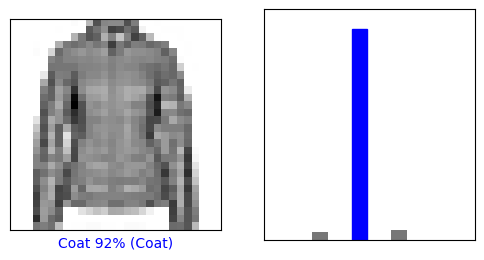

In [39]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)


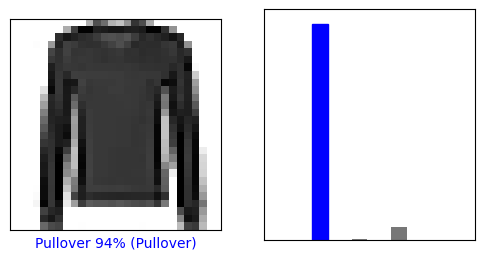

In [31]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

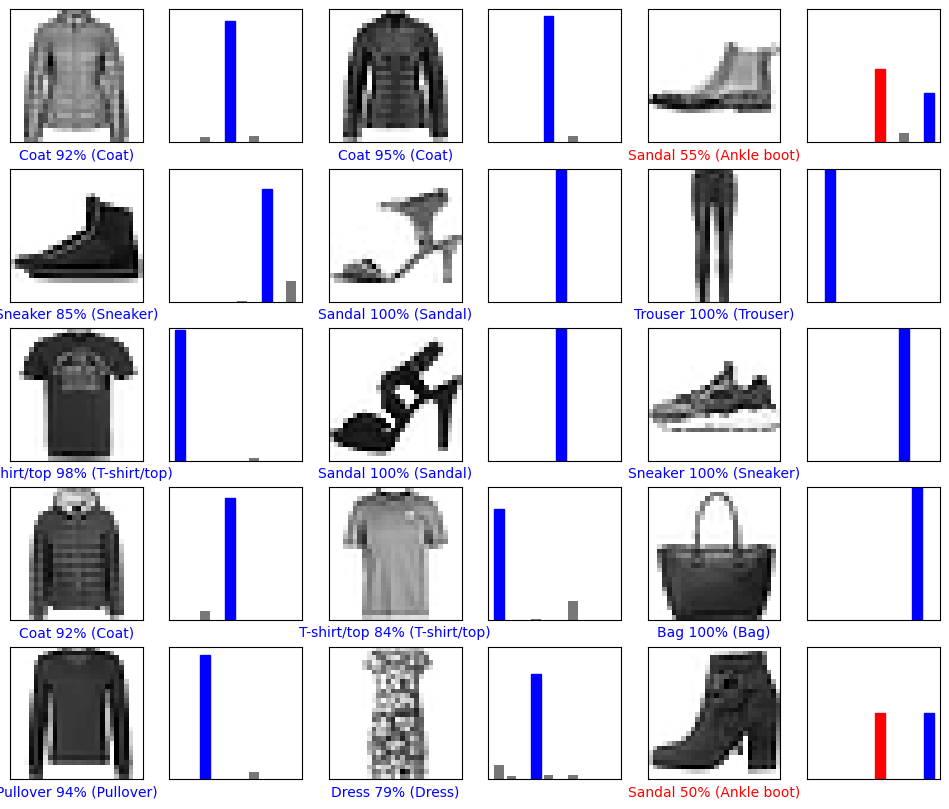

In [41]:
num_rows = 5
num_col = 3
num_images = num_rows*num_col
plt.figure(figsize=(2*2*num_col, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_col, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_col, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [42]:
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [43]:
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [44]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 68ms/step
[[3.8368973e-05 9.7289958e-05 3.5882074e-02 3.2157230e-03 9.1542542e-01
  3.8723031e-21 4.5339130e-02 0.0000000e+00 2.0381331e-06 1.8880195e-25]]


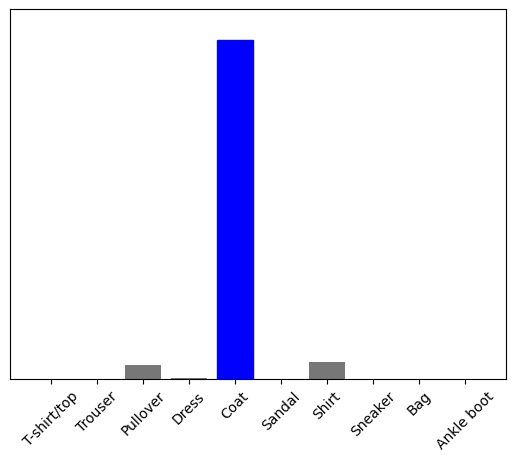

In [45]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_name, rotation=45)

In [47]:
np.argmax(predictions_single[0])


4